In [11]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/ce/25/a557ee10ac9dce1300850024707ce1850a6958f1673a9194be878b99d631/matplotlib-3.8.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/5b/ac/26fa1057f62beaa2af4c55c6ac733b114a403b746cfe0ce3dc6e4aec921a/contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/14/f9/14494b9b440a8ab0b8746d0c65b25c2a5ba22ed9a946d0895e2e4f39d06f/fonttools-4.47.0-cp311-cp311-macosx_10_9_universal2.whl.metadata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 2.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip


In [2]:
import pandas as pd

df = pd.read_csv('./sim_city_results_01.csv')

df

,time,time_sim,age_sim,hour_sim,arm_selected,reward
0,2024-01-12 18:00:20,2024-01-12 12:00:12,23,12,option2,1
1,2024-01-12 18:00:20,2024-01-13 13:00:15,49,13,option3,1
2,2024-01-12 18:00:20,2024-01-12 21:00:04,10,21,option1,0
3,2024-01-12 18:00:20,2024-01-12 17:00:00,101,17,option3,1
4,2024-01-12 18:00:20,2024-01-13 11:00:40,36,11,option3,1
...,...,...,...,...,...,...
2409,2024-01-12 18:01:15,2024-01-12 15:00:02,19,15,option1,0
2410,2024-01-12 18:01:15,2024-01-12 20:00:53,22,20,option2,1
2411,2024-01-12 18:01:15,2024-01-12 06:00:58,78,6,option3,1
2412,2024-01-12 18:01:15,2024-01-13 14:00:34,95,14,option3,1


           age_sim     hour_sim       reward
count  2414.000000  2414.000000  2414.000000
mean     59.300331    11.475145     0.530655
std      34.556232     6.847399     0.499163
min       0.000000     0.000000     0.000000
25%      30.000000     5.000000     0.000000
50%      58.000000    12.000000     1.000000
75%      90.000000    17.000000     1.000000
max     119.000000    23.000000     1.000000
                     time             time_sim  age_sim  hour_sim  \
1     2024-01-12 18:00:20  2024-01-13 13:00:15       49        13   
3     2024-01-12 18:00:20  2024-01-12 17:00:00      101        17   
4     2024-01-12 18:00:20  2024-01-13 11:00:40       36        11   
5     2024-01-12 18:00:20  2024-01-12 10:00:54       96        10   
6     2024-01-12 18:00:20  2024-01-12 03:00:27       99         3   
...                   ...                  ...      ...       ...   
2405  2024-01-12 18:01:15  2024-01-13 01:00:57       37         1   
2408  2024-01-12 18:01:15  2024-01-12 16:00

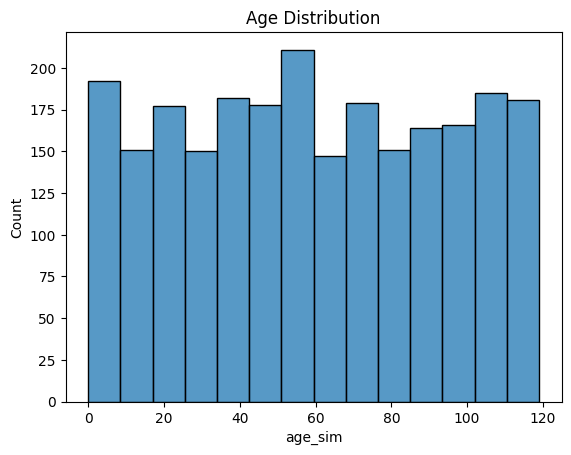

In [3]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Filter data
filtered_data = df[df['age_sim'] > 30]
print(filtered_data)

# Visualization (assuming you have matplotlib or seaborn installed)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot age distribution
sns.histplot(df['age_sim'])
plt.title('Age Distribution')
plt.show()

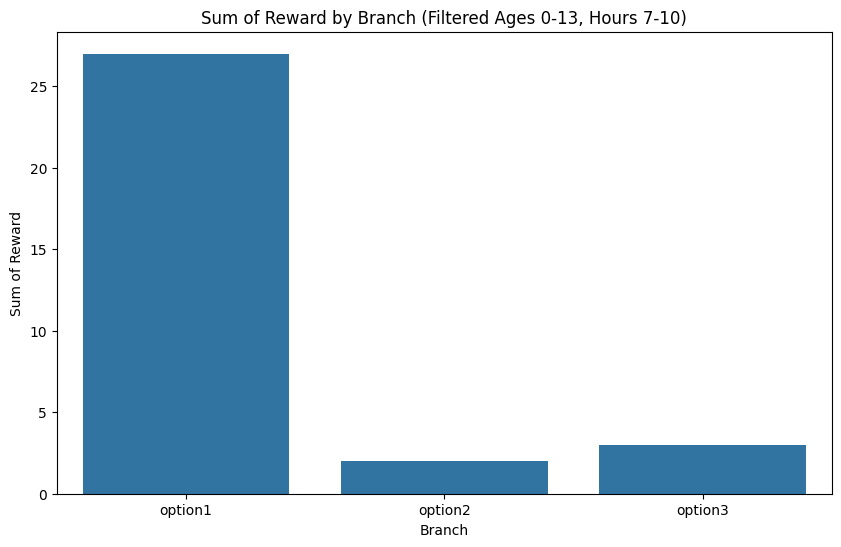

In [5]:
filtered_data = df[(df['age_sim'] >= 0) & (df['age_sim'] <= 13) & (df['hour_sim'] >= 7) & (df['hour_sim'] <= 10)]

grouped_data = filtered_data.groupby('arm_selected')['reward'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='arm_selected', y='reward', data=grouped_data)
plt.title('Sum of Reward by Branch (Filtered Ages 0-13, Hours 7-10)')
plt.xlabel('Branch')
plt.ylabel('Sum of Reward')
plt.show()

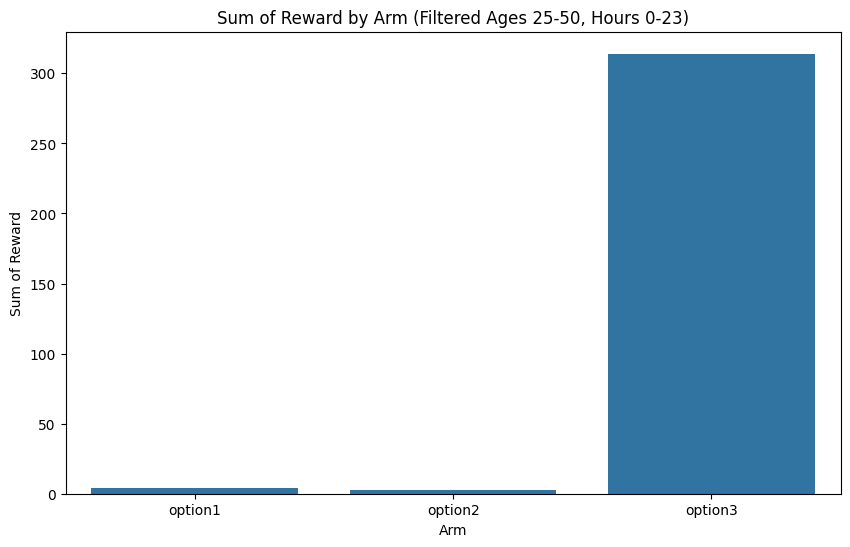

In [54]:
import numpy as np
filtered_data = df[(df['age_sim'] >= 25) & (df['age_sim'] <= 50) & (df['hour_sim'] >= 0) & (df['hour_sim'] <= 23)]

grouped_data = filtered_data.groupby('arm_selected')['reward'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='arm_selected', y='reward', data=grouped_data)
plt.title('Sum of Reward by Arm (Filtered Ages 25-50, Hours 0-23)')
plt.xlabel('Arm')
plt.ylabel('Sum of Reward')
plt.show()

In [27]:
# Results of teen - morning/day
# Bernoulli with p = 0.9
# Best reward (expected) = 53 (pulls) * 0.9 p

filtered_data = df[(df['age_sim'] >= 0) & (df['age_sim'] <= 13) & (df['hour_sim'] >= 10) & (df['hour_sim'] <= 25)]

len(filtered_data)
sum = len(filtered_data)*0.5
print(sum)

column_sum = filtered_data['reward'].sum()
print(column_sum)
print(len(filtered_data))
print(88.5-71)

# Regret 17 - 177 pulls

88.5
71
177
17.5


In [29]:
filtered_data = df[(df['age_sim'] >= 14) & (df['age_sim'] <= 25) & (df['hour_sim'] >= 7) & (df['hour_sim'] <= 20)]
len(filtered_data)
sum = len(filtered_data)*0.7
print(sum)

column_sum = filtered_data['reward'].sum()
print(column_sum)
print(len(filtered_data))
print(95.89-51)
# Regret 44 pulls 137

95.89999999999999
51
137
44.89


In [41]:
group1 = df[(df['age_sim'] >= 0) & (df['age_sim'] <= 13) & (df['hour_sim'] >= 7) & (df['hour_sim'] <= 15)]
group2 = df[((df['age_sim'] >= 0) & (df['age_sim'] <= 13)) & 
            ((df['hour_sim'] >= 16) & (df['hour_sim'] <= 24) | (df['hour_sim'] >= 0) & (df['hour_sim'] <= 7))]


,time,time_sim,age_sim,hour_sim,arm_selected,reward
2,2024-01-12 18:00:20,2024-01-12 21:00:04,10,21,option1,0
11,2024-01-12 18:00:20,2024-01-13 07:00:22,10,7,option2,0
14,2024-01-12 18:00:20,2024-01-13 00:00:09,12,0,option2,0
16,2024-01-12 18:00:20,2024-01-13 03:00:00,0,3,option1,0
37,2024-01-12 18:00:21,2024-01-12 22:00:20,12,22,option2,0
...,...,...,...,...,...,...
2338,2024-01-12 18:01:14,2024-01-13 16:00:08,8,16,option1,0
2341,2024-01-12 18:01:14,2024-01-12 16:00:23,8,16,option1,1
2349,2024-01-12 18:01:14,2024-01-13 17:00:21,12,17,option2,0
2365,2024-01-12 18:01:14,2024-01-13 02:00:57,9,2,option3,0


In [46]:


group3 = df[(df['age_sim'] >= 14) & (df['age_sim'] <= 25) & (df['hour_sim'] >= 7) & (df['hour_sim'] <= 20)]

group4 = df[(df['age_sim'] >= 14) & (df['age_sim'] <= 25) & 
            ((df['hour_sim'] >= 21) & (df['hour_sim'] <= 24) | (df['hour_sim'] >= 0) & (df['hour_sim'] <= 7))]

group5 = df[(df['age_sim'] >= 25) & (df['age_sim'] <= 50) & (df['hour_sim'] >= 0) & (df['hour_sim'] <= 25)]

group6 = df[(df['age_sim'] >= 50) & (df['age_sim'] <= 200) & (df['hour_sim'] >= 7) & (df['hour_sim'] <= 10)]
group7 = df[(df['age_sim'] >= 50) & (df['age_sim'] <= 200) 
            & (((df['hour_sim'] >= 11) & (df['hour_sim'] <= 24)) | ((df['hour_sim'] >= 0) & (df['hour_sim'] <= 7)))]

best_reward_group1 = len(group1) * 0.9
best_reward_group2 = len(group2) * 0.5
best_reward_group3 = len(group3) * 0.7
best_reward_group4 = len(group4) * 0.9
best_reward_group5 = len(group5) * 0.9 
best_reward_group6 = len(group6) * 0.5
best_reward_group7 = len(group7) * 0.9

best_reward = best_reward_group1 + best_reward_group2 +
              best_reward_group3 + best_reward_group4 + 
              best_reward_group5 + best_reward_group6 +
              best_reward_group7
best_reward

2089.3

In [48]:
column_sum = df['reward'].sum()
column_sum

1281

In [49]:
len(df)

2414

In [52]:
Regret = 2089 - 1281
Reward = 1281

print(Regret)
print(Reward)

Regret de 808 en 2414 tiradas en un experimento con un epsilon greedy de 0.5
Reward total de 1281

808
1281
